In [1]:
# Time Based Learning Rate Decay
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
# load dataset
dataframe = read_csv("/home/anish/Downloads/ionosphere.data", header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:34].astype(float)
Y = dataset[:,34]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)
# create model
model = Sequential()
model.add(Dense(32, input_shape=(34,), activation='relu'))
model.add(Dense(64, input_shape=(34,), activation='relu'))
model.add(Dense(32, input_shape=(34,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
# epochs = 50
# learning_rate = 0.1
# decay_rate = learning_rate / epochs
# momentum = 0.8
# sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
# # Fit the model
# model.fit(X, Y, validation_split=0.33, epochs=epochs, batch_size=28, verbose=2)

2022-08-13 13:12:47.471365: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-08-13 13:12:48.441535: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-08-13 13:12:48.442147: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-08-13 13:12:48.510185: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-13 13:12:48.510397: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 2060 computeCapability: 7.5
coreClock: 1.695GHz coreCount: 30 deviceMemorySize: 5.79GiB deviceMemoryBandwidth: 312.97GiB/s
2022-08-13 13:12:48.510428: I tensorflow/stream_executor/platform/de

In [2]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
import numpy as np
import matplotlib.pyplot as plt

In [3]:
epoch = 50
optimizer = Adam(lr = 1e-3)
model.compile(loss = "mean_squared_error", optimizer = optimizer)
lr_schedule = LearningRateScheduler(lambda epoch : 1e-5 * 10**(epoch/10))
history = model.fit(X, Y, epochs = epoch, batch_size = 32, callbacks = [lr_schedule])

2022-08-13 13:12:49.487705: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-08-13 13:12:49.505171: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2899885000 Hz


Epoch 1/50
11/11 [==============================] - 0s 1ms/step - loss: 0.2299
Epoch 2/50
11/11 [==============================] - 0s 1ms/step - loss: 0.2323
Epoch 3/50
 1/11 [=>............................] - ETA: 0s - loss: 0.2296

2022-08-13 13:12:49.767580: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


11/11 [==============================] - 0s 1ms/step - loss: 0.2300
Epoch 4/50
11/11 [==============================] - 0s 1ms/step - loss: 0.2292
Epoch 5/50
11/11 [==============================] - 0s 1ms/step - loss: 0.2272
Epoch 6/50
11/11 [==============================] - 0s 1ms/step - loss: 0.2213
Epoch 7/50
11/11 [==============================] - 0s 1ms/step - loss: 0.2249
Epoch 8/50
11/11 [==============================] - 0s 1ms/step - loss: 0.2282
Epoch 9/50
11/11 [==============================] - 0s 1ms/step - loss: 0.2238
Epoch 10/50
11/11 [==============================] - 0s 1ms/step - loss: 0.2251
Epoch 11/50
11/11 [==============================] - 0s 1ms/step - loss: 0.2160
Epoch 12/50
11/11 [==============================] - 0s 1ms/step - loss: 0.2134
Epoch 13/50
11/11 [==============================] - 0s 1ms/step - loss: 0.2042
Epoch 14/50
11/11 [==============================] - 0s 1ms/step - loss: 0.1938
Epoch 15/50
11/11 [==============================] - 0s 1m

(1e-05, 0.1, 0.0, 0.5)

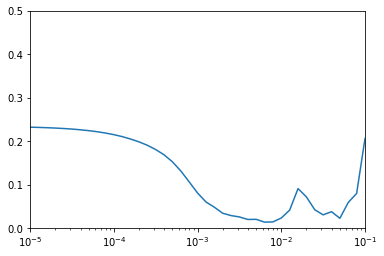

In [4]:
lrs = 1e-5 * 10**(np.arange(50)/10)
history.history["loss"]
plt.semilogx(lrs,history.history["loss"])
plt.axis([1e-5, 1e-1, 0, 0.5])

In [5]:
len(lrs)

50

In [6]:
len(history.history["loss"])

50

In [7]:
losses = history.history["loss"].copy()
print(min(losses))
print(losses.index(min(losses)))
print(lrs[losses.index(min(losses))])
print(round(lrs[losses.index(min(losses))],5))

0.013489560224115849
28
0.00630957344480193
0.00631


In [8]:
best_lr = round(lrs[losses.index(min(losses))],5)
print(best_lr)
type(best_lr)

0.00631


numpy.float64

In [9]:
import tensorflow as tf

In [10]:
# epoch = 100
# optimizer_new = Adam(lr = best_lr)
# model.compile(loss = "mean_squared_error", optimizer = optimizer_new)
# history = model.fit(X, Y, epochs = epoch, batch_size = 32)

In [11]:
# tf.keras.backend.clear_session()
# new_model = Sequential()
# new_model.add(Dense(32, input_shape=(34,), activation='relu'))
# new_model.add(Dense(64, input_shape=(34,), activation='relu'))
# new_model.add(Dense(32, input_shape=(34,), activation='relu'))
# new_model.add(Dense(1, activation='sigmoid'))
# epoch = 100
# optimizer_new = Adam(lr = best_lr)
# new_model.compile(loss = "mean_squared_error", optimizer = optimizer_new)
# history = new_model.fit(X, Y, epochs = epoch, batch_size = 32)

In [12]:
def reinitialize_model(model, initializer = tf.keras.initializers.random_uniform()):
    for layer in model.layers:
        layer.set_weights([initializer(shape=w.shape) for w in layer.get_weights()])

In [13]:
reinitialize_model(model)
epoch = 100
optimizer_new = Adam(lr = best_lr)
model.compile(loss = "mean_squared_error", optimizer = optimizer_new)
history = model.fit(X, Y, epochs = epoch, batch_size = 32)

Epoch 1/100
11/11 [==============================] - 0s 1ms/step - loss: 0.2428
Epoch 2/100
11/11 [==============================] - 0s 1ms/step - loss: 0.1850
Epoch 3/100
11/11 [==============================] - 0s 1ms/step - loss: 0.1540
Epoch 4/100
11/11 [==============================] - 0s 1ms/step - loss: 0.1076
Epoch 5/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0627
Epoch 6/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0477
Epoch 7/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0327
Epoch 8/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0149
Epoch 9/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0203
Epoch 10/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0168
Epoch 11/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0179
Epoch 12/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0180
Epoch 13/100
11/11 [=================